### 1 - Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan_df = pd.read_csv('LoanStats_2018Q4.csv')

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000.0,25000.0,25000.0,60 months,14.47%,587.82,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,31450.0,31450.0,31450.0,36 months,7.56%,979.16,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.1 - Choose one variable and plot that variable four different ways.

Variable: employment length

In [4]:
loan_df['emp_length'].unique()

array(['6 years', '10+ years', '< 1 year', '3 years', '7 years', '4 years',
       '2 years', '9 years', nan, '1 year', '5 years', '8 years'], dtype=object)

In [5]:
emp_length_dict = {'6 years': 6, '10+ years': 10, '< 1 year': 0.5, '3 years': 3, '7 years': 7, '4 years': 4,
       '2 years': 2, '9 years': 9, '1 year': 1, '5 years': 5, '8 years': 8}

def convert_emp_length(col):
    return int(emp_length_dict[col])

In [6]:
loan_df['emp_length'] = loan_df[loan_df['emp_length'].notnull()]['emp_length'].apply(convert_emp_length)

**histogram**

Pros:
-  Easy to understand.  basically a count plot
-  Can add hues easily

Cons:
-  Not the prettiest

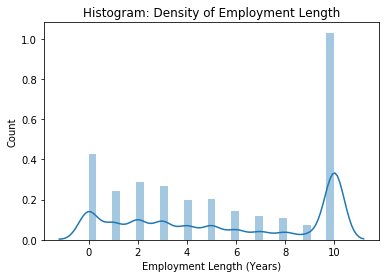

In [52]:
sns.distplot(loan_df[loan_df['emp_length'].notnull()]['emp_length'], kde = True)
plt.title('Histogram: Density of Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Count')

**Countplot**

Pros:
-  Pretty, aesthetically pleasing
-  Basically same as histogram above in this case

Cons:
-  difficult to add hues for this many columns

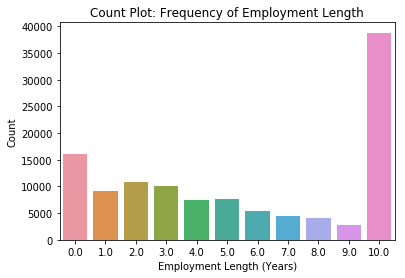

In [11]:
sns.countplot(x = 'emp_length', data = loan_df)
plt.title('Count Plot: Frequency of Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Count')

**boxplot**

Pros:
-  Easy to see avg, range, and outliers (if any)

Cons:  
-  No density info, so can't see that most customers are 10+ yrs

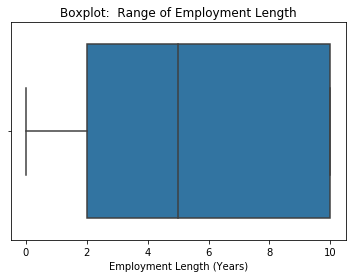

In [13]:
sns.boxplot(x = 'emp_length', data = loan_df)
plt.title('Boxplot:  Range of Employment Length')
plt.xlabel('Employment Length (Years)')


**Violin Plot**

Pros:
-  Combines boxplot and histogram so can see density and range

Cons: 
-  Can't see avg
-  Actually its labeled but so hard to see

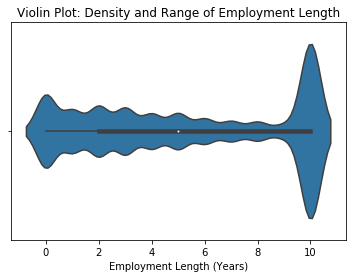

In [16]:
sns.violinplot(x= 'emp_length', data = loan_df)
plt.title('Violin Plot: Density and Range of Employment Length')
plt.xlabel('Employment Length (Years)')

#### 1.2 - Choose two continuous variables, and plot them three different ways
Continuous variables:  loan amount and funded amount, or funded amt and int_rate?  or annual incom and int rate?

In [17]:
def convert_intrate(col):
    num =  col.split('%')[0]
    return float(num)
        
loan_df['int_rate'] = loan_df[loan_df['int_rate'].notnull()]['int_rate'].apply(convert_intrate)

**Scatterplot**
Pros:  
-  Can see that income over 0.2e7 have interest rates at around 20% or below.  Not true for everyone else
-  Can see density in a way

Cons:
-  How dense is it below 0.2e7 income?

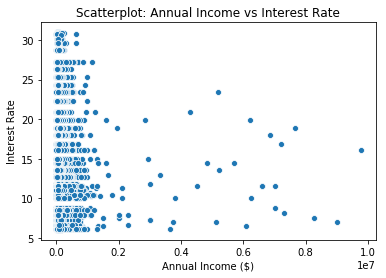

In [19]:
sns.scatterplot(x = 'annual_inc', y = 'int_rate', data = loan_df)
plt.title('Scatterplot: Annual Income vs Interest Rate')
plt.xlabel('Annual Income ($)')
plt.ylabel('Interest Rate')

**Scatterplot with Regression**

Pros:
-  Shows negative trend between interest rate and annual income

Cons:
-  Regression line not exactly accurate.  Yes, there is a trend but its not linear

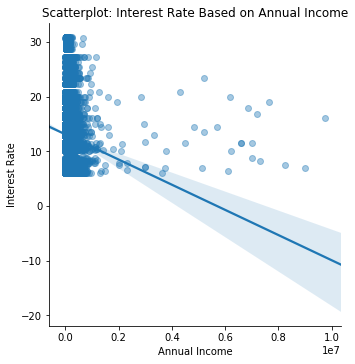

In [20]:
g = sns.lmplot(y='int_rate', 
               x='annual_inc', 
               data=loan_df, 
               fit_reg=True, 
               scatter_kws={'alpha':0.4})
g.set_ylabels("Interest Rate")
g.set_xlabels("Annual Income")
plt.title('Scatterplot: Interest Rate Based on Annual Income')

**Line Plot**

Pros: 
-  Not sure there is one.  Can see density below 0.2e7?

Cons: 
-  This is a mess.  

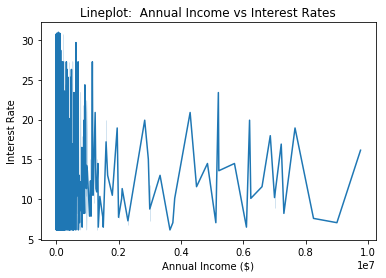

In [22]:
sns.lineplot(x = 'annual_inc', y= 'int_rate', data = loan_df)
plt.title('Lineplot:  Annual Income vs Interest Rates')
plt.xlabel('Annual Income ($)')
plt.ylabel('Interest Rate')

#### 1.2 - Choose two continuous variables, and plot them three different ways.
Continuous variables:  funded amount and installment

**Scatterplot**

Pros:  
-  Can see clear positive trend
-  after 10k funded amount see a cutoff

Cons
-  can see trend but not confidence level


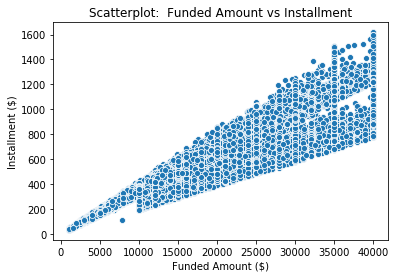

In [45]:
sns.scatterplot(x = 'funded_amnt', y = 'installment', data = loan_df)
plt.title('Scatterplot:  Funded Amount vs Installment')
plt.xlabel('Funded Amount ($)')
plt.ylabel('Installment ($)')

**Scatterplot with Regression**

Pros:
-  Confirms positive trend

Cons:
-  Not sure how to make two positive trend lines, i think there are
-  Hard to see line.  Might be able to make it a diff color though

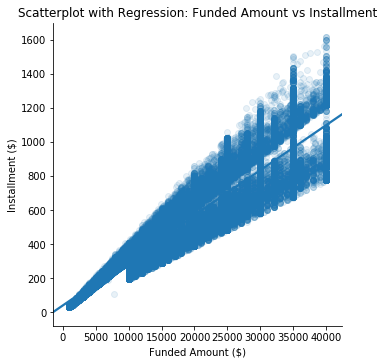

In [49]:
g = sns.lmplot(y='installment', 
               x='funded_amnt', 
               data=loan_df, 
               fit_reg=True, 
               scatter_kws={'alpha':0.1})
g.set_ylabels("Installment ($)")
g.set_xlabels("Funded Amount ($)")
plt.title('Scatterplot with Regression: Funded Amount vs Installment')

**Lineplot**

Pros:
-  although noisy looking, actually easier to see positive trend

Cons:
-  Actually looks like you lose the second trend line though

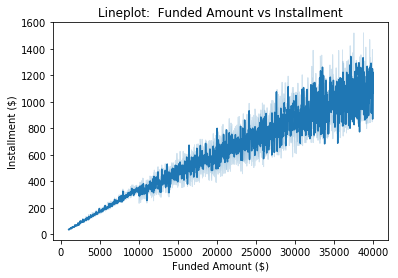

In [51]:
sns.lineplot(x = 'funded_amnt', y = 'installment', data = loan_df)
plt.title('Lineplot:  Funded Amount vs Installment')
plt.xlabel('Funded Amount ($)')
plt.ylabel('Installment ($)')

#### 1.3 -Choose one continuous variable and one categorical variable, and plot them six different ways.

Continuous variable:  funded amount  
Categorical variable: Grade

In [23]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

**Barplot**

Pros:  
-  Easy to see min/max means out of all the grades
-  Got lucky in this dataset, the confidence levels are pretty small except for the last two, which makes it very jarring and noticable  

Cons:
-  Wasted space below 10k

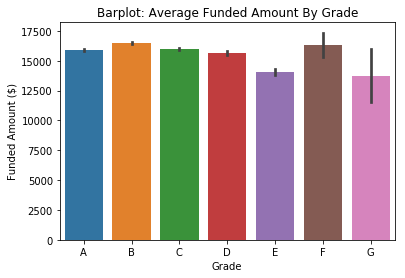

In [26]:
sns.barplot(x = 'grade', y = 'funded_amnt', data = loan_df, order = grade_order)
plt.title('Barplot: Average Funded Amount By Grade')
plt.xlabel('Grade')
plt.ylabel('Funded Amount ($)')

**Pointplot**
Pros:
-  similar pros to barplot

Cons:
-  Due to big confidence bars on F and G, seems overpowering in this y axis

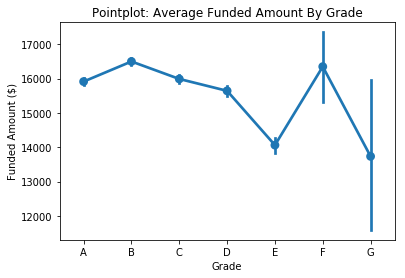

In [27]:
sns.pointplot(x = 'grade', y = 'funded_amnt', data = loan_df, order = grade_order)
plt.title('Pointplot: Average Funded Amount By Grade')
plt.xlabel('Grade')
plt.ylabel('Funded Amount ($)')

**Boxplot**
Pros:
-  Easy to see ranges in funded amounts
-  Can see outliers, if any

Cons:
-  Takes more effort to see min/max avgs for each grade, not like point or bar plots

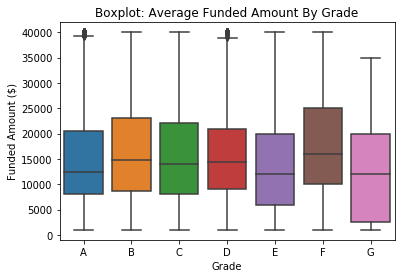

In [28]:
sns.boxplot(x = 'grade', y = 'funded_amnt', data = loan_df, order = grade_order)
plt.title('Boxplot: Average Funded Amount By Grade')
plt.xlabel('Grade')
plt.ylabel('Funded Amount ($)')

**Histogram**

Pros:
-  Can see range of funded amount is from 0 to 40k

Cons:
-  This is just garbage

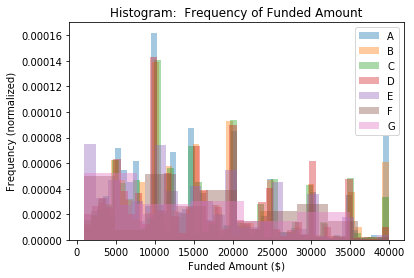

In [30]:
sns.distplot(loan_df[loan_df['grade']=='A']['funded_amnt'], kde = False, norm_hist=True, label = 'A')
sns.distplot(loan_df[loan_df['grade']=='B']['funded_amnt'], kde = False, norm_hist=True, label = 'B')
sns.distplot(loan_df[loan_df['grade']=='C']['funded_amnt'], kde = False, norm_hist=True, label = 'C')
sns.distplot(loan_df[loan_df['grade']=='D']['funded_amnt'], kde = False, norm_hist=True, label = 'D')
sns.distplot(loan_df[loan_df['grade']=='E']['funded_amnt'], kde = False, norm_hist=True, label = 'E')
sns.distplot(loan_df[loan_df['grade']=='F']['funded_amnt'], kde = False, norm_hist=True, label = 'F')
sns.distplot(loan_df[loan_df['grade']=='G']['funded_amnt'], kde = False, norm_hist=True, label = 'G')
plt.legend()
plt.title('Histogram:  Frequency of Funded Amount')
plt.xlabel('Funded Amount ($)')
plt.ylabel('Frequency (normalized)')

**Violin Plot**

Pros:
-More information that boxplot because can see density

Cons:
-  Has avg info, but hard to see with the white dot
-  Not everyone knows how to read violin plot

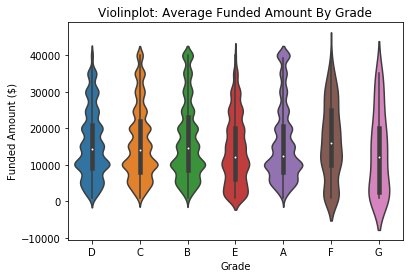

In [31]:
sns.violinplot(y = 'funded_amnt', x = 'grade', data = loan_df)
plt.title('Violinplot: Average Funded Amount By Grade')
plt.xlabel('Grade')
plt.ylabel('Funded Amount ($)')

**Catplot**

Pros:
-  Can see sparcity?  I'm not sure what the density means

Cons:
-  Again, not everyone knows how to read this (including me)
-  May not work well for big datasets such as this

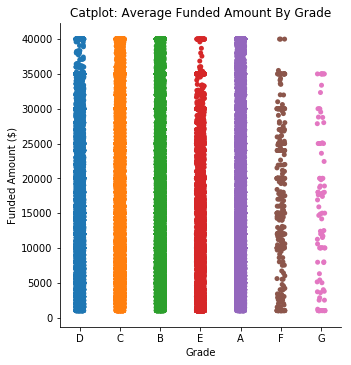

In [32]:
sns.catplot(x = 'grade', y = 'funded_amnt', data = loan_df)
plt.title('Catplot: Average Funded Amount By Grade')
plt.xlabel('Grade')
plt.ylabel('Funded Amount ($)')

### 2 - Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships

In [53]:
heart_df = pd.read_csv('heart.csv')

In [54]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 2.1 - Probability distributions
There are four plots below.  The top half are distributions of resting blood pressure and max heart rates separated by if the patient has heart disease or not.  For the resting blood pressure distribution, blood pressure ranges from 90 to 180, with a peak at 130 for both populations.  For the heart rate distribution, the range is between 80 to 200.  Those without heart disease peaked at ~140 whereas those with heart diseased peaked at 170.

The bottom half features scatterplots with trend lines.  On the bottom left, we see that there is a positive relationship between age and cholesterol, with those who have heart disease having a slightly stronger correlation.  On the bottom right shows the relationship between age and max heart rate.  In general, the max heart rate decreases with age.  However, the max heart rate decreases more quickly for those with heart disease.

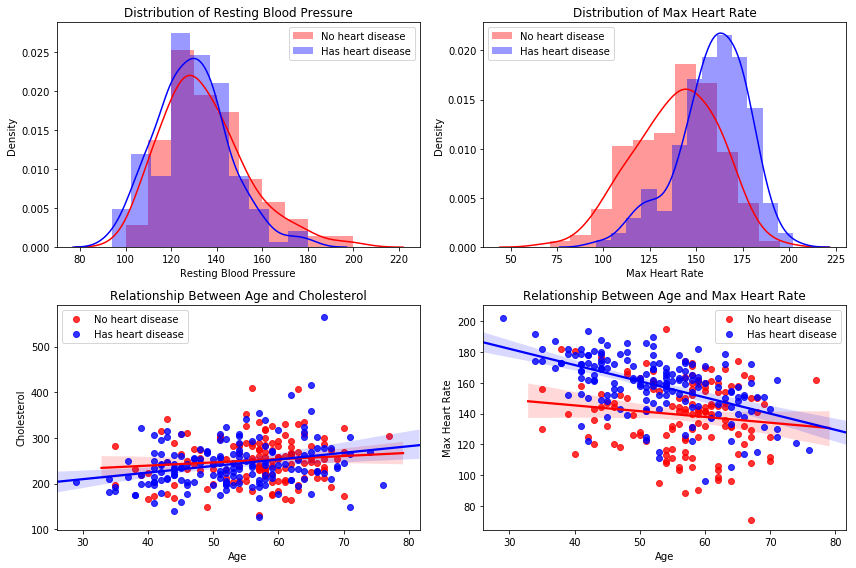

In [101]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(12,8))


sns.distplot(heart_df[heart_df['target']==0]['trestbps'], label = 'No heart disease', color = 'red', bins = 10, ax = axis1)
sns.distplot(heart_df[heart_df['target']==1]['trestbps'], label = 'Has heart disease', color = 'blue', bins = 10, ax = axis1)

sns.distplot(heart_df[heart_df['target']==0]['thalach'], label = 'No heart disease', color = 'red', ax = axis2)
sns.distplot(heart_df[heart_df['target']==1]['thalach'], label = 'Has heart disease', color = 'blue', ax = axis2)

sns.regplot(x = 'age', y = 'chol', data = heart_df[heart_df['target']==0], label = 'No heart disease', color = 'red', ax = axis3)
sns.regplot(x = 'age', y = 'chol', data = heart_df[heart_df['target']==1], label = 'Has heart disease', color = 'blue', ax = axis3)

sns.regplot(x = 'age', y = 'thalach', data = heart_df[heart_df['target']==0], label = 'No heart disease', color = 'red', ax = axis4)
sns.regplot(x = 'age', y = 'thalach', data = heart_df[heart_df['target']==1], label = 'Has heart disease', color = 'blue', ax = axis4)


axis1.set_title('Distribution of Resting Blood Pressure')
axis2.set_title('Distribution of Max Heart Rate')
axis3.set_title('Relationship Between Age and Cholesterol')
axis4.set_title('Relationship Between Age and Max Heart Rate')

axis1.set_xlabel('Resting Blood Pressure')
axis2.set_xlabel('Max Heart Rate')
axis3.set_xlabel('Age')
axis3.set_ylabel('Cholesterol')
axis4.set_xlabel('Age')
axis4.set_ylabel('Max Heart Rate')

for ax in [axis1, axis2]:
    ax.set_ylabel('Density')
for ax in [axis1, axis2, axis3, axis4]:
    ax.legend()
plt.tight_layout()